In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score

In [3]:
#reading an data 

In [7]:
df = pd.read_csv('train_hsbc_df.csv')

In [111]:
df.head(30)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
5196,151,'C1349321790','3','F','28007','M857378720','28007','es_hotelservices',405.49,1
3552,103,'C1817318774','2','F','28007','M1741626453','28007','es_sportsandtoys',181.61,1
2513,73,'C1175850429','4','M','28007','M480139044','28007','es_health',557.25,1
4964,144,'C1225533078','2','F','28007','M1198415165','28007','es_wellnessandbeauty',149.42,1
5410,157,'C1375316332','1','F','28007','M151143676','28007','es_barsandrestaurants',382.52,1
5016,146,'C1472480119','2','F','28007','M980657600','28007','es_sportsandtoys',60.60,1
1510,44,'C806399525','2','F','28007','M840466850','28007','es_tech',304.08,1
4896,142,'C1344489848','4','F','28007','M480139044','28007','es_health',327.56,1
462,13,'C1101633489','1','F','28007','M980657600','28007','es_sportsandtoys',109.52,1
1863,54,'C2104407126','2','F','28007','M480139044','28007','es_health',485.09,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513643 entries, 0 to 513642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         513643 non-null  int64  
 1   customer     513643 non-null  object 
 2   age          513643 non-null  object 
 3   gender       513643 non-null  object 
 4   zipcodeOri   513643 non-null  object 
 5   merchant     513643 non-null  object 
 6   zipMerchant  513643 non-null  object 
 7   category     513643 non-null  object 
 8   amount       513643 non-null  float64
 9   fraud        513643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 39.2+ MB


In [15]:
df.describe().round(1)

,step,amount,fraud
count,513643.0,513643.0,513643.0
mean,95.0,37.9,0.0
std,51.1,111.6,0.1
min,0.0,0.0,0.0
25%,52.0,13.7,0.0
50%,97.0,26.9,0.0
75%,139.0,42.6,0.0
max,179.0,7665.6,1.0


In [31]:
object_cols = ["category"]

for i in object_cols:
    print("name of the Column : {}".format(i))
    print("Unique column ", i, ":{}".format(df[i].nunique()))
    print("Values of unique columns of ", i, "is below: \n{}".format(df[i].value_counts()))
    print("here the history of Category where multiple times Fraudulent detection occured")
    

name of the Column : category
Unique column  category :15
Values of unique columns of  category is below: 
category
'es_transportation'        436311
'es_food'                   22651
'es_health'                 13917
'es_wellnessandbeauty'      13044
'es_fashion'                 5567
'es_barsandrestaurants'      5548
'es_hyper'                   5287
'es_sportsandtoys'           3437
'es_tech'                    2021
'es_home'                    1714
'es_hotelservices'           1523
'es_otherservices'            802
'es_contents'                 764
'es_travel'                   625
'es_leisure'                  432
Name: count, dtype: int64
here the history of Category where multiple times Fraudulent detection occured


In [27]:
df.isna().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

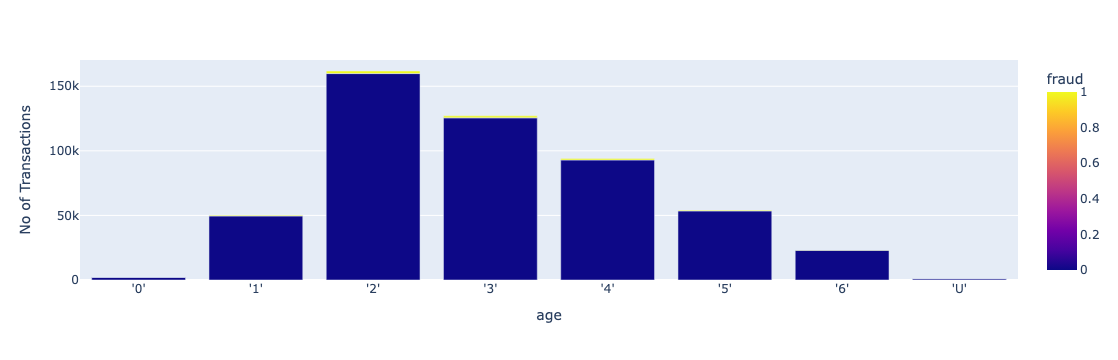

In [65]:
df = pd.read_csv("train_hsbc_df.csv")

grouped = df.groupby(["age", "fraud"]).size().reset_index(name="count")

representation = px.bar(grouped, x="age", y="count", color="fraud", barmode="group",
             labels={"age": "age", "count": "No of Transactions"})

representation.show()

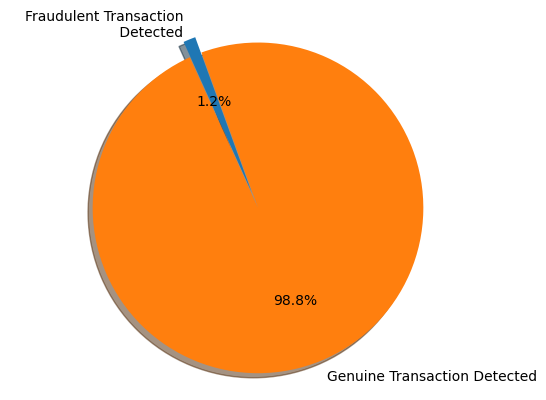

In [55]:
count1 = 0 
count0 = 0
for i in df['fraud'].values:
    if i == 0:
        count0 += 1
    else:
        count1 += 1
        
count1 = (count1/len(df['fraud']))*100
count0 = (count0/len(df['fraud']))*100

x = ['Fraudulent Transaction\n Detected','Genuine Transaction Detected']
y = [count1, count0]


explode = (0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # I am representing piechart representation

plt.show()

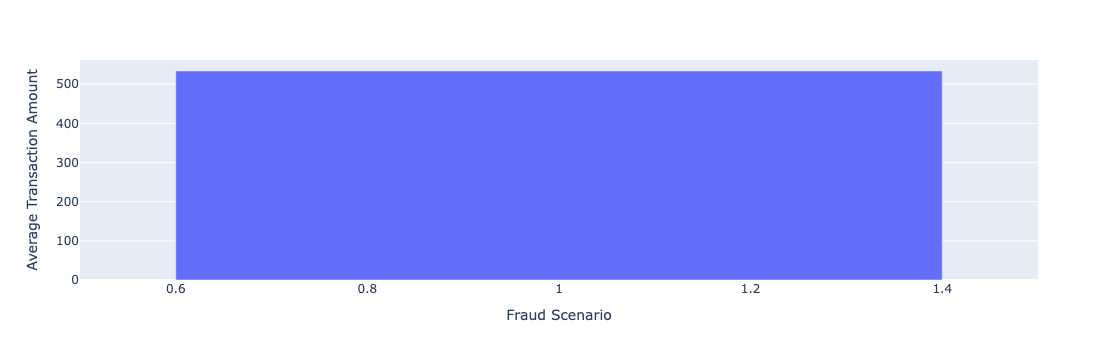

In [89]:
df = pd.read_csv("train_hsbc_df.csv")

df = df[(df['fraud'] != 0) & (df['amount'] != 0)]

grouped = df.groupby('fraud')['amount'].mean().reset_index(name='mean_amount')

fig = px.bar(grouped, x='fraud', y='mean_amount', labels={'fraud':'Fraud Scenario','mean_amount':'Average Transaction Amount'})

fig.show()

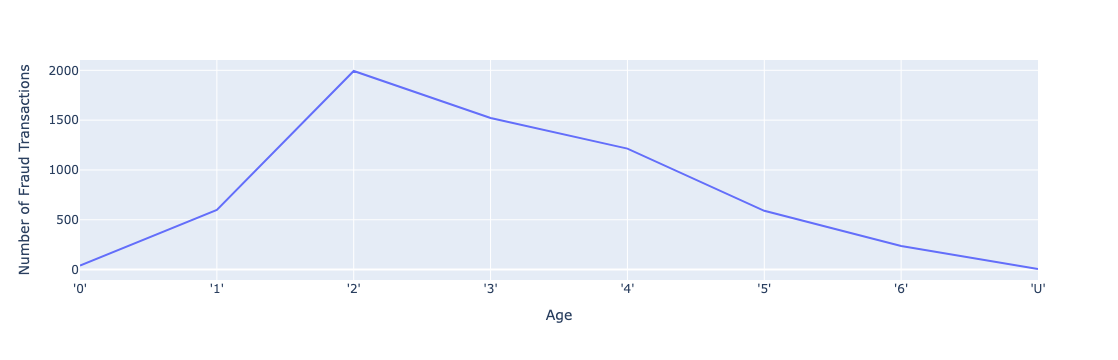

In [93]:
df = pd.read_csv("train_hsbc_df.csv")

grouped = df.groupby(["age", "fraud"]).size().reset_index(name="count")

grouped = df[df['fraud'] == 1].groupby('age').size().reset_index(name='count')

fig = px.line(grouped, x='age', y='count', labels={'age':'Age','count':'Number of Fraud Transactions'})

fig.show()

In [95]:
# balancing the dataset

In [101]:
df = pd.read_csv("train_hsbc_df.csv")
df = df.drop(df.index[0])

fraud = df[df['fraud'] == 1]

nonfr = df[df['fraud'] == 0]

n_non_fraud = len(nonfr)

frsamp = fraud.sample(n_non_fraud, replace=True)

df_sampled = pd.concat([frsamp, nonfr])

df = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

df.to_csv('fresh_transactions.csv', index=False)

print("Succesfully ,fresh dataset is created")

Succesfully ,fresh dataset is created


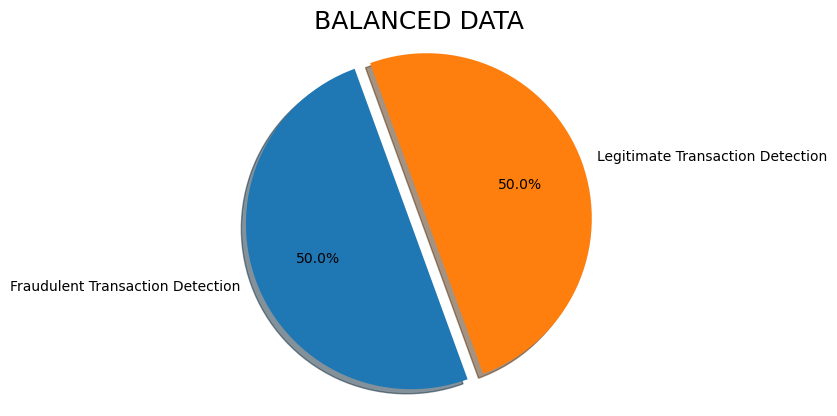

In [107]:

df = df_upsampled
count1 = 0 
count0 = 0
for i in df['fraud'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df['fraud']))*100
count0 = (count0/len(df['fraud']))*100

x = ['Fraudulent Transaction Detection','Legitimate Transaction Detection']
y = [count1, count0]


explode = (0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal') 
plt.title('BALANCED DATA',fontsize=18)
plt.show()

In [109]:
#feature extraction

In [235]:
df = pd.read_csv("train_hsbc_df.csv")
df_features = df.drop(['age','gender','zipMerchant','category'], axis=1)
print(df_features.head())

   step       customer zipcodeOri       merchant  amount  fraud
0     0   'C583110837'    '28007'   'M480139044'   44.26      1
1     0  'C1332295774'    '28007'   'M480139044'  324.50      1
2     0  'C1160421902'    '28007'   'M857378720'  176.32      1
3     0   'C966214713'    '28007'   'M857378720'  337.41      1
4     0  'C1450140987'    '28007'  'M1198415165'  220.11      1


In [237]:
print(df_features.dtypes)
df_features = df_features.apply(pd.to_numeric, errors='coerce')

step            int64
customer       object
zipcodeOri     object
merchant       object
amount        float64
fraud           int64
dtype: object


In [239]:
df_features = df_features.fillna(0)
print(df_features.dtypes)

step            int64
customer      float64
zipcodeOri    float64
merchant      float64
amount        float64
fraud           int64
dtype: object


In [241]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_features = scaler.fit_transform(df_features)

In [243]:
df = pd.read_csv("train_hsbc_df.csv")
X = standardized_features
y = df["fraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [245]:
models = {"Logistic Regression": LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Gradient Boosting": GradientBoostingClassifier()}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {acc:.3f}")

Logistic Regression accuracy: 1.000
K-Nearest Neighbors accuracy: 1.000
Decision Tree accuracy: 1.000
Random Forest accuracy: 1.000
Gradient Boosting accuracy: 1.000


In [227]:
dt_clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_test, y_test)

print("Best hyper Parameters: ", grid_search.best_params_)

Best hyper Parameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [195]:
#confusion matrix

In [229]:
model = DecisionTreeClassifier(max_depth= None, min_samples_leaf=1,min_samples_split=2)
model.fit(X_train, y_train)

y_pred_DTC = model.predict(X_test)

acc = accuracy_score(y_test, y_pred_DTC)
cm_DTC = confusion_matrix(y_test, y_pred_DTC)
print("Decision Tree Classifier:")
print("Accuracy:", acc)
print("Confusion Matrix -->\n", cm_DTC)

Decision Tree Classifier:
Accuracy: 1.0
Confusion Matrix -->
 [[101505      0]
 [     0   1224]]


Text(0.5, 1.0, 'Evaluation Model for Confusion Matrix: Decision Tree Classifier')

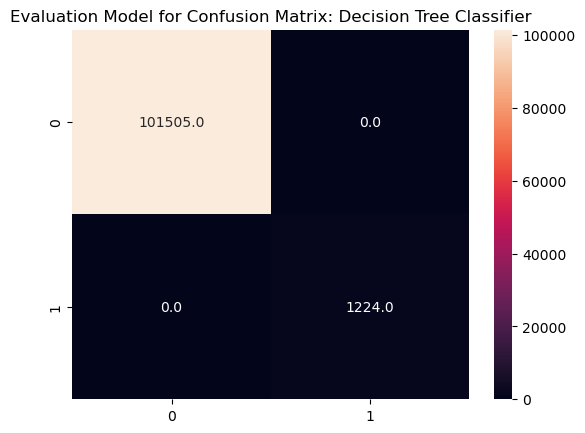

In [256]:
cm_sns_DTC = sns.heatmap(cm_DTC,annot=True,fmt='.1f')
cm_sns_DTC.set_title('Evaluation Model for Confusion Matrix: Decision Tree Classifier')

In [258]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred_RFC = model.predict(X_test)

acc = accuracy_score(y_test, y_pred_RFC)
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
print("Random Forest Classifier:")
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm_RFC)

Random Forest Classifier:
Accuracy: 1.0
Confusion Matrix:
 [[101505      0]
 [     0   1224]]


Text(0.5, 1.0, 'Confusion Matrix: Random Forest Classifier')

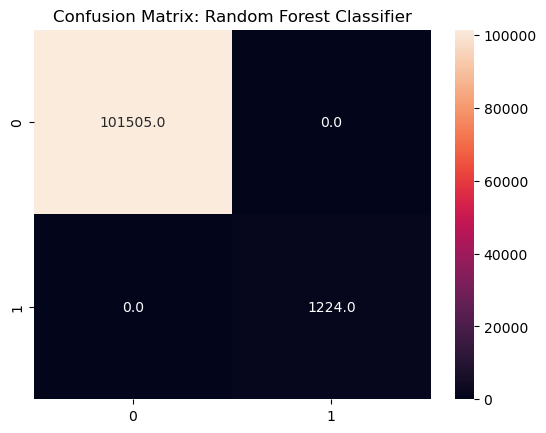

In [259]:
cm_model = sns.heatmap(cm_RFC,annot=True,fmt='.1f')
cm_model.set_title('Confusion Matrix: Random Forest Classifier')

In [260]:
precision_DTC = precision_score(y_test, y_pred_DTC)
recall_DTC = recall_score(y_test, y_pred_DTC)
f1_DTC = f1_score(y_test, y_pred_DTC)
print("Decision Tree Classifier:")
print("Precision: ", precision_DTC)
print("Recall: ", recall_DTC)
print("F1-Score: ", f1_DTC)

Decision Tree Classifier:
Precision:  1.0
Recall:  1.0
F1-Score:  1.0


In [263]:
average_precision = average_precision_score(y_test, y_pred_DTC)

print("Average precision-recall score: {:.2f}".format(average_precision))

Average precision-recall score: 1.00


In [265]:
average_precision_RFC = average_precision_score(y_test, y_pred_RFC)

print("Average precision-recall score: {:.2f}".format(average_precision))

Average precision-recall score: 1.00
